<a href="https://colab.research.google.com/github/elileal/Report_Machine_Learning/blob/master/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy  as np
import seaborn as sb
import matplotlib.pyplot as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

%matplotlib inline

url = "https://raw.githubusercontent.com/elileal/Report_Machine_Learning/master/wine/wine.data"

# IRIS
col_names = [
  'label', 
  'Alcohol',
  'Malic_acid',
  'Ash',
  'Alcalinity_of_ash',  
  'Magnesium',
  'Total_phenols',
  'Flavanoids',
  'Nonflavanoid_phenols',
  'Proanthocyanins',
  'Color_intensity',
  'Hue',
  'OD280_OD315_of_diluted_wines',
  'Proline'
]

feature_cols = [ 
  'Alcohol',
  'Malic_acid',
  'Ash',
  'Alcalinity_of_ash',  
  'Magnesium',
  'Total_phenols',
  'Flavanoids',
  'Nonflavanoid_phenols',
  'Proanthocyanins',
  'Color_intensity',
  'Hue',
  'OD280_OD315_of_diluted_wines',
  'Proline'
]

# Carregar base de dados
dataset = pd.read_csv(url, header=None, names=col_names)


X = dataset[feature_cols] # Atributos (Features)
y = dataset.label # Saída


In [10]:
dataset

,label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [0]:
X

In [0]:
Y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

In [0]:
# Árvore de Decisão
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(X_train, y_train)

## Predição e Resultados
result = model.predict(X_test)
acc = metrics.accuracy_score(result, y_test)
show_tree = round(acc * 100)

In [0]:
# KNN
def train_pred_knn(n, X_train, y_train):
  model = KNeighborsClassifier(n_neighbors=n, metric='euclidean', algorithm='brute')
  model = model.fit(X_train, y_train)
  result = model.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  return round(acc * 100)

knn5 = train_pred_knn(5, X_train, y_train)
knn10 = train_pred_knn(10, X_train, y_train)

In [0]:
# MLP

def mlp_arc_fit(l1, l2, X_train, y_train):
  model = MLPClassifier(hidden_layer_sizes=(l1, l2), activation='tanh',max_iter=2000)
  model = model.fit(X_train, y_train)
  result = model.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  return round(acc * 100)

# Arquitetura (4,2)
mlp42 = mlp_arc_fit(4, 2, X_train, y_train)

# Arquitetura (2, 1)
mlp21 = mlp_arc_fit(4, 2, X_train, y_train)


In [19]:
# KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

dataset['kmeans-label'] = kmeans.labels_

dataset['kmeans-label']

dataset



,label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline,kmeans-label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [0]:
# Resultados
data = {'knn5': [knn5], 'knn10': [knn10], 'tree': [show_tree], 'mlp (4, 2)': [mlp42], 'mlp (2, 1)': [mlp21]}

df = pd.DataFrame(data)
df

,knn5,knn10,tree,"mlp (4, 2)","mlp (2, 1)"
0,75.0,78.0,97.0,100.0,72.0


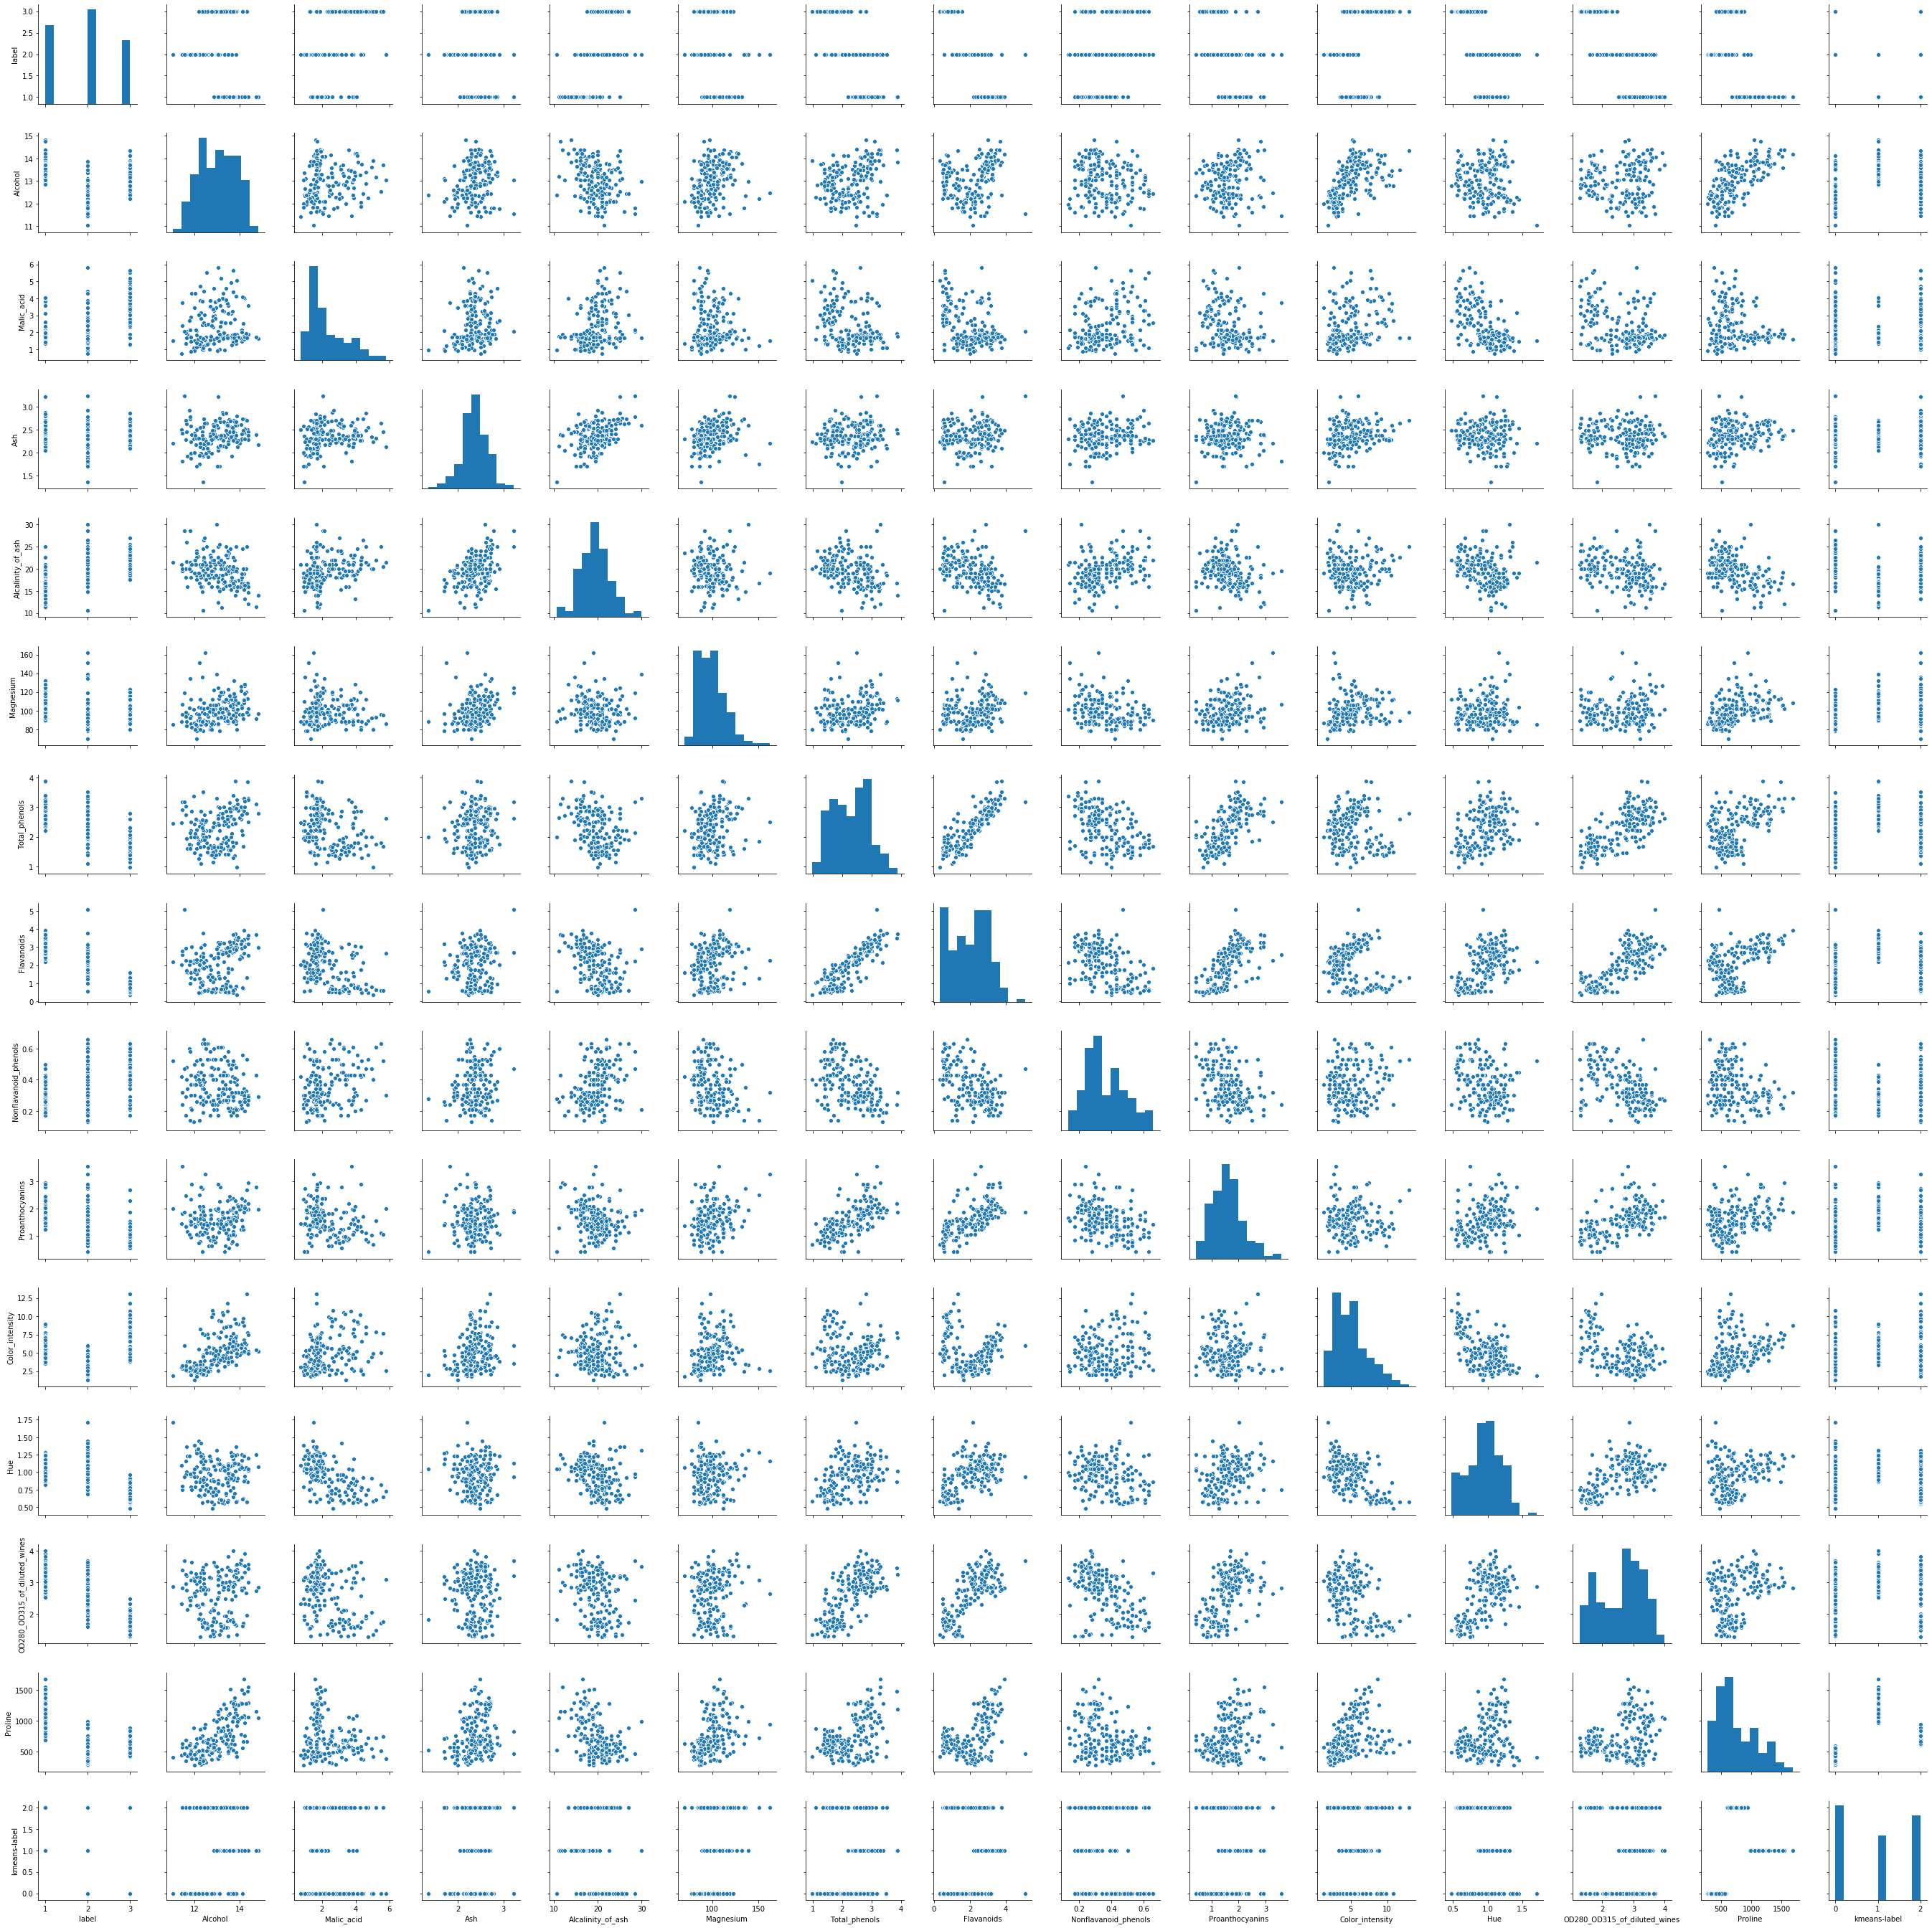

In [22]:
sb.pairplot(dataset,hue='dataset.label')

In [0]:
sb.plot